**mounting gdrive**

In [0]:

from google.colab import drive

drive.mount('/content/gdrive' ,force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**imports**

In [0]:
import numpy as np, math,re,random
import scipy.spatial
from sklearn.mixture import GaussianMixture

**taking input**

In [0]:



with open('/content/gdrive/My Drive/datasets/prnnass1/P1a_test_data_2D.txt') as file:
    array2d = [[digit for digit in re.split(',|\n',line)] for line in file]
matrix=[]
for i in range(len(array2d)):
  temp=[]
  for j in range (3):
    temp.append(float(array2d[i][j]))
  matrix.append(temp)

print(matrix)
matrix=np.array(matrix)
no_of_ele=len(matrix)
matrix.shape

[[0.059, 0.4532, 1.0], [-1.234, -0.1377, 1.0], [1.1535, 1.1037, 1.0], [-0.6642, 1.4021, 1.0], [0.8231, -0.6175, 1.0], [-0.3612, -0.7085, 1.0], [-0.1505, 0.0523, 1.0], [-1.1616, -1.5282, 1.0], [0.3352, 0.8145, 1.0], [1.0757, 0.2885, 1.0], [-0.2241, -0.2479, 1.0], [-0.9179, 0.907, 1.0], [-0.542, 0.2571, 1.0], [0.1537, -0.8303, 1.0], [0.1856, 0.3454, 1.0], [-0.6904, -0.8166, 1.0], [1.9039, 0.5624, 1.0], [1.8911, 1.5117, 1.0], [-1.8708, -0.7566, 1.0], [1.6273, -0.6965, 1.0], [0.044, -0.3293, 1.0], [-0.2897, 0.6444, 1.0], [-1.101, -1.7142, 1.0], [1.3077, -1.3357, 1.0], [-1.8993, -1.2741, 1.0], [-1.1786, -0.2491, 1.0], [0.1103, 0.3913, 1.0], [0.3947, 0.8929, 1.0], [-0.2708, 0.6765, 1.0], [0.5804, -0.8824, 1.0], [0.2588, 0.4261, 1.0], [-0.9292, -0.5895, 1.0], [1.2864, 1.0852, 1.0], [0.1484, 0.959, 1.0], [1.0762, 0.5385, 1.0], [-1.1322, -1.7471, 1.0], [-0.8071, -0.3929, 1.0], [0.0752, -0.3767, 1.0], [0.7561, 0.1229, 1.0], [-0.6624, -1.3317, 1.0], [-0.2024, -0.0449, 1.0], [-0.4149, 0.2713, 1.0]

(200, 3)

radom  number generator 

In [0]:
def random_gen(num):
  ran=[]
  ran=random.sample(range(1, no_of_ele), num)
  return ran

**estimating mu**

In [0]:
def em_algo():
  # plt.plot(matrix[:,0], matrix[:,1], 'bx')
  # plt.axis('equal')
  # plt.show()



  gmm = GaussianMixture(n_components=2)
  gmm.fit(matrix[:,:2])

  print(gmm.means_)
  print('\n')
  print(gmm.covariances_)
  return gmm.covariances_[0],gmm.covariances_[1],gmm.means_[0],gmm.means_[1]




# X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
# XX = np.array([X.ravel(), Y.ravel()]).T
# Z = gmm.score_samples(XX)
# Z = Z.reshape((50,50))
 
# plt.contour(X, Y, Z)
# plt.scatter(matrix[:, 0], matrix[:, 1])
 
# plt.show()
# y_pred = gmm.fit(matrix[:,:2],matrix[:,2]).predict(matrix_test[:,:2])
# print((matrix[:,2] != y_pred).sum())

In [0]:
def est_lamda(ran):
  mu1,mu2,ran=est_mu(ran)
  lam=[0,0]
  lam[0]=1/mu1[0]
  lam[1]=1/mu1[1]
return lam

In [0]:
def est_mu(ran):
  mu1=[]
  mu2=[]
  #num=len(matrix)
  s1=0
  s2=0
  s3=0
  s4=0
  c1=0
  c2=0
  #ran=[]

  #ran=random.sample(range(1, no_of_ele), num)
  for i in ran :
    if matrix[int(i)][2]==1:
      s1+=matrix[i][0]
      s2+=matrix[i][1]
      c1+=1
    else:
      s3+=matrix[i][0]
      s4+=matrix[i][1]
      c2+=1
  if c1!=0:
    s1/=c1
    s2/=c1
  if c2!=0:
    s3/=c2
    s4/=c2

  return [s1,s2],[s3,s4],ran


**estimating covariance**

In [0]:
def est_cov(num):
  mu1,mu2,ran=est_mu(num)
  cov1=np.zeros((len(mu1),len(mu1)))
  cov2=np.zeros((len(mu2),len(mu2)))
  c1=0
  c2=0
  #print(matrix[1][:2]-mu1)
  for i in ran:
    if matrix[i][2]==1:
      cov1+=np.outer((matrix[i][:2]-mu1),(matrix[i][:2]-mu1))
      c1+=1
    else:
      cov2+=np.outer((matrix[i][:2]-mu2),(matrix[i][:2]-mu2))
      c2+=1
  print(mu1)
  return cov1/c1,cov2/c2,mu1,mu2
# print(est_cov(10))

**taking test**

In [0]:
import numpy as np, math,re
with open('/content/gdrive/My Drive/datasets/prnnass1/P1a_test_data_2D.txt') as file:
    array2d = [[digit for digit in re.split(',|\n',line)] for line in file]
matrix_test=[]
for i in range(len(array2d)):
  temp=[]
  for j in range (3):
    temp.append(float(array2d[i][j]))
  matrix_test.append(temp)

print(matrix_test)
matrix_test=np.array(matrix_test)
matrix_test.shape

[[0.059, 0.4532, 1.0], [-1.234, -0.1377, 1.0], [1.1535, 1.1037, 1.0], [-0.6642, 1.4021, 1.0], [0.8231, -0.6175, 1.0], [-0.3612, -0.7085, 1.0], [-0.1505, 0.0523, 1.0], [-1.1616, -1.5282, 1.0], [0.3352, 0.8145, 1.0], [1.0757, 0.2885, 1.0], [-0.2241, -0.2479, 1.0], [-0.9179, 0.907, 1.0], [-0.542, 0.2571, 1.0], [0.1537, -0.8303, 1.0], [0.1856, 0.3454, 1.0], [-0.6904, -0.8166, 1.0], [1.9039, 0.5624, 1.0], [1.8911, 1.5117, 1.0], [-1.8708, -0.7566, 1.0], [1.6273, -0.6965, 1.0], [0.044, -0.3293, 1.0], [-0.2897, 0.6444, 1.0], [-1.101, -1.7142, 1.0], [1.3077, -1.3357, 1.0], [-1.8993, -1.2741, 1.0], [-1.1786, -0.2491, 1.0], [0.1103, 0.3913, 1.0], [0.3947, 0.8929, 1.0], [-0.2708, 0.6765, 1.0], [0.5804, -0.8824, 1.0], [0.2588, 0.4261, 1.0], [-0.9292, -0.5895, 1.0], [1.2864, 1.0852, 1.0], [0.1484, 0.959, 1.0], [1.0762, 0.5385, 1.0], [-1.1322, -1.7471, 1.0], [-0.8071, -0.3929, 1.0], [0.0752, -0.3767, 1.0], [0.7561, 0.1229, 1.0], [-0.6624, -1.3317, 1.0], [-0.2024, -0.0449, 1.0], [-0.4149, 0.2713, 1.0]

(200, 3)

**implementing nearest neighbour**

In [0]:

def nearest_neighbour(rep):
  rep=[]
  for i in range(20):
    rep.append(matrix[random.randint(0,no_of_ele-1)])
  rep=np.array(rep)
  covar_matrix=np.cov(np.transpose(matrix[:,:2]))
  inv_covar_matrix=np.linalg.pinv(covar_matrix)
  label=[]
  for i in range(len(matrix_test)):
    min_dist=9999
    loc=0
    
    for j in range (20):
      dist=scipy.spatial.distance.mahalanobis(matrix_test[i,:2],rep[j,:2],inv_covar_matrix)
      if dist< min_dist:
        min_dist=dist
        loc=j
    label.append(rep[loc,2])
  count=0
  for i in range(len(matrix_test)):
    if int(label[i]) !=int(matrix_test[i,2]) :
      count+=1
  count/=len(matrix_test)


  return 1-count



In [0]:
!pip install pomegranate

     |████████████████████████████████| 5.6MB 2.8MB/s 


**implementing bayes classifier**

In [0]:
def bayes_class_gauss(X,mu1,mu2,cov1,cov2,p1,p2):
  cov_inv1=np.linalg.pinv(cov1)
  cov_inv2=np.linalg.pinv(cov2)
  label=0
  label+=.5*np.transpose(X) @ (cov_inv1-cov_inv2) @ X
  label+=np.transpose(X) @ (np.dot(cov_inv1,mu1)-np.dot(cov_inv2,mu2))
  label+=.5*((np.transpose(mu2) @ cov_inv2 @ mu2 )-(np.transpose(mu1)@ cov_inv1 @ mu1)) 
  label+=math.log(p1/p2) + .5*math.log((np.linalg.det(cov2)/np.linalg.det(cov1)))
  if label > 0 :
    return 1
  else :
    return -1
#bayes_class(matrix,[0,0],[1,1],[[1,0.5],[0.5,1]],[[1,0],[0,2]],.5,.5)

In [0]:
def bayes_class_gauss_lam(X,mu,cov,lamda):
  cov_inv=np.linalg.pinv(cov)
  label=0
  label+=-.5*math.log((2*math.pi)**2 * np.linalg.det(cov))
  label+=-.5*(np.transpose(X-mu) @ cov_inv @ (X-mu)
  label+=-math.log(lamda[0]*lamda[1]) + lamda[0]*X[:,0] +lamda[1]*X[:,1]



SyntaxError: ignored

In [0]:
def bayes_accuracy(ran,estimation_tech):
  if estimation_tech=='ml':
    cov1,cov2,mu1,mu2=est_cov(ran)
  elif estimation_tech=='em':
    cov1,cov2,mu1,mu2=em_algo()
  # mu1=np.array([0,0])
  # mu2=np.array([1,1])
  # cov1=np.array([[1,.5],[.5,1]])
  # cov2=np.array([[1,0],[0,2]])
  p1=0
  for i in range(len(matrix)):
    if matrix[i][2]==1:
      p1+=1
  p1/=len(matrix)
  p2=1-p1
  #print(p1)
  #p1=p2=.5
  #print(bayes_class(matrix_test[1,:2],mu1,mu2,cov1,cov2,p1,p2))
  label=[]
  for i in range(len(matrix_test)):
    label.append(bayes_class(matrix_test[i,:2],mu1,mu2,cov1,cov2,p1,p2))
  count=0
  for i in range(len(matrix_test)):
    if int(label[i]) !=int(matrix_test[i,2]) :
      count+=1
  count/=len(matrix_test)


  return 1-count


In [0]:
def plot (approx,y,z,w):
  import matplotlib.pyplot as plt
  
  plt.plot(approx,y,color='g')
  plt.plot(approx,z)
  plt.plot(approx,w,color='m')
  plt.show()

[-0.13746000000000003, -0.26424000000000003]
[[ 0.03481505 -0.15474018]
 [ 1.03045405  1.18611765]]


[[[ 0.93001366  0.50131456]
  [ 0.50131456  0.84177485]]

 [[ 1.21097174 -0.16445817]
  [-0.16445817  2.2168238 ]]]
[-0.046854545454545454, 0.44820909090909083]
[[ 0.03481505 -0.15474018]
 [ 1.03045405  1.18611765]]


[[[ 0.93001366  0.50131456]
  [ 0.50131456  0.84177485]]

 [[ 1.21097174 -0.16445817]
  [-0.16445817  2.2168238 ]]]
[0.13447619047619047, 0.23902380952380953]
[[ 0.02897151 -0.15887885]
 [ 1.02796558  1.17935975]]


[[[ 0.92579633  0.50117093]
  [ 0.50117093  0.83740869]]

 [[ 1.20974261 -0.15955982]
  [-0.15955982  2.21393813]]]
[0.06722173913043479, 0.01936666666666666]
[[ 0.02897151 -0.15887885]
 [ 1.02796558  1.17935975]]


[[[ 0.92579633  0.50117093]
  [ 0.50117093  0.83740869]]

 [[ 1.20974261 -0.15955982]
  [-0.15955982  2.21393813]]]
[0.09090909090909091, 0.0334212121212121]
[[ 1.02796558  1.17935975]
 [ 0.02897151 -0.15887885]]


[[[ 1.20974261 -0.15955982]
  [-0

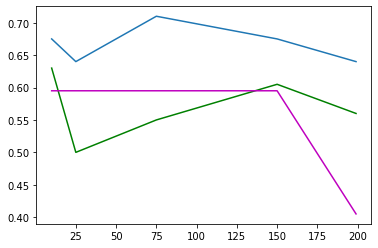

In [0]:
def driver():
  approx=[10,25,75,150,199]
  y=[]
  z=[]
  w=[]
  for i in approx :
    ran=random_gen(i)
    y.append(bayes_accuracy(ran,'ml'))
    z.append(nearest_neighbour(ran))
    w.append(bayes_accuracy(ran,'em'))
  plot(approx,y,z,w)

driver()


**implementing in scikitlearn**

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(matrix[:,:2],matrix[:,2]).predict(matrix_test[:,:2])
print((matrix[:,2] != y_pred).sum())

48


@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

**em algorithm gaussian mixture modelusing skitlearn**

Automatically created module for IPython interactive environment
(100, 2)


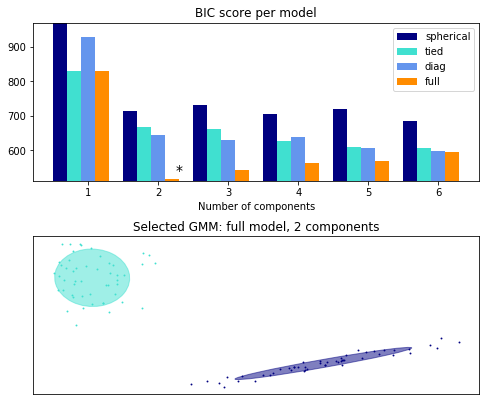

In [0]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 50

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
print(X.shape)
matrix=np.array(matrix)
#X=matrix[:100,:2]
#print(X.shape)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()
